In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model

from os.path import expanduser
home = expanduser('~')

def func(x, a, b, c, d):
    return a + b * x + c * x ** 2 + d * x ** 3

In [14]:
def plot_path(stat_file, amplitudes, width, height, label, upper_bound=None, lower_bound=None, 
              xmax=None):

    X_AXIS = '$M_4$ Displacement Amplitude ($\AA$)'
    Y_AXIS = '$\Delta$E (meV/atom)'
    LABEL_FONT = 17
    
    df = pd.read_table(stat_file)
    print(df.keys())

    df['de'] = (df['energy']-df['energy'][lower_bound])*1000/32
    disp = np.array(amplitudes)
    df['disp'] = disp*0.01

    ## Remove certain rows
    # df = df.drop([1], axis=0)

    YLIMS = [None, None]
    XLIMS = [0   , None]

    fig = plt.figure(figsize=(width,height))


    for kpt in ['M1']:#, 'R', 'X', 'Z', 'GG']:
        sub_df = df#[df.kpoint == kpt]
        x = sub_df['disp'].to_numpy()[lower_bound:upper_bound]
        y = sub_df['de'].to_numpy()[lower_bound:upper_bound]
        plt.scatter(x, y, color='k', clip_on=False)

        # Fitting to Landau model
        def landau(x, a, b, c, d):
            return a*x**2 + b*x**4 + c*x**6 - d

        pmodel = Model(landau)
        params = pmodel.make_params(a=-1,b=1, c=1, d=1)
        result = pmodel.fit(y, params, x=x)
        #print(result.fit_report())

        if xmax:
            x2 = np.linspace(0, xmax, 100)
        else:
            x2 = np.linspace(0, x.max(), 100)
        y2 = result.eval(x=x2)

        plt.plot(x2, y2, 'k-', label='Landau fit')

    # Chance font size
    plt.gca().xaxis.label.set_fontsize(LABEL_FONT)
    plt.gca().yaxis.label.set_fontsize(LABEL_FONT)
    plt.gca().tick_params(labelsize=LABEL_FONT)
    # plt.gca().get_yticklabels().fontsize(LABEL_FONT)

    plt.gca().set_axisbelow(True)
    plt.grid(True)
    plt.xlabel(X_AXIS)
    plt.ylabel(Y_AXIS)
    if xmax:
        plt.xlim((0, xmax))
    else:
        plt.xlim((0, max(x)))
    plt.ylim(YLIMS)
    plt.legend(fancybox=True, ncol=2, framealpha=0.5, fontsize=LABEL_FONT, loc='upper center')#, loc='lower right') 
    # plt.text(0.99, 0.12, "$U_{eff}$ = 3 eV", horizontalalignment='right', verticalalignment='top',\
    #          transform=plt.gca().transAxes,fontsize=LABEL_FONT+2)

    plt.show()

    ## Saving plot
    fig.savefig(f'mod-path-{label}' + '.png', bbox_inches='tight', dpi=500)
    fig.savefig(f'mod-path-{label}-vec' + '.pdf', bbox_inches='tight')

Index(['run_id', 'energy', 'volume', 'mag_s', 'mag_p', 'mag_d', 'mag_tot',
       'point_group', 'lattice'],
      dtype='object')


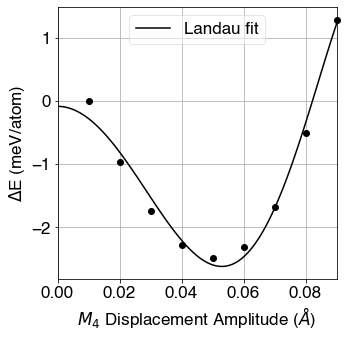

Index(['run_id', 'energy', 'volume', 'mag_s', 'mag_p', 'mag_d', 'mag_tot',
       'point_group', 'lattice'],
      dtype='object')


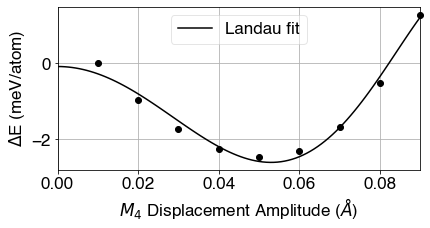

In [15]:
### Ground state surface
infile = home + '/Projects/BaCoS2/correct_mag/disp-estruc/stats-M4-no-0.tsv'
amplitudes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
bounds=[0, 9]
plot_path(infile, amplitudes, width=5, height=5, label='M4-extrap', 
          lower_bound=bounds[0], upper_bound=bounds[1])
plot_path(infile, amplitudes, width=6.5, height=3, label='M4-extrap-wide', 
          lower_bound=bounds[0], upper_bound=bounds[1])

Index(['run_id', 'energy', 'volume', 'mag_s', 'mag_p', 'mag_d', 'mag_tot',
       'point_group', 'lattice'],
      dtype='object')


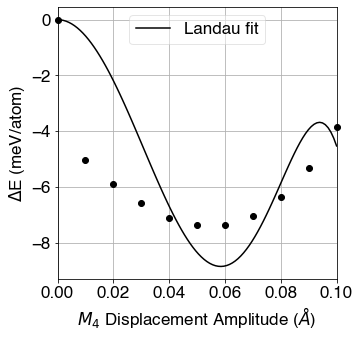

Index(['run_id', 'energy', 'volume', 'mag_s', 'mag_p', 'mag_d', 'mag_tot',
       'point_group', 'lattice'],
      dtype='object')


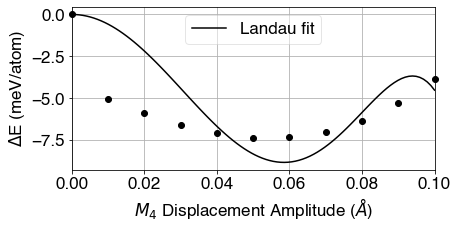

In [4]:
### Ground state surface
infile = home + '/Projects/BaCoS2/correct_mag/disp-estruc/stats-G3-M4.tsv'
amplitudes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
plot_path(infile, amplitudes, width=5, height=5, label='M4-gs')
plot_path(infile, amplitudes, width=6.5, height=3, label='M4-gs-wide')

Index(['run_id', 'energy', 'volume', 'mag_s', 'mag_p', 'mag_d', 'mag_tot',
       'point_group', 'lattice'],
      dtype='object')


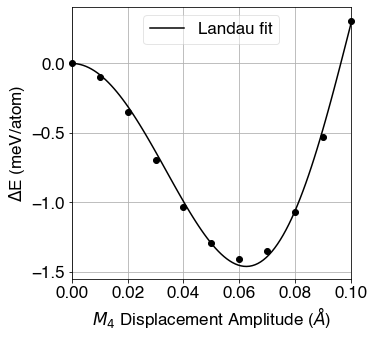

Index(['run_id', 'energy', 'volume', 'mag_s', 'mag_p', 'mag_d', 'mag_tot',
       'point_group', 'lattice'],
      dtype='object')


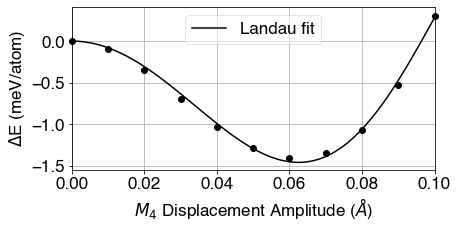

In [5]:
### Ground state surface
infile = home + '/Projects/BaCoS2/correct_mag/disp-estruc/stats-M4.tsv'
amplitudes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
plot_path(infile, amplitudes, width=5, height=5, label='crooked-M4-gs')
plot_path(infile, amplitudes, width=6.5, height=3, label='crooked-M4-gs-wide')

Index(['run_id', 'energy', 'volume', 'mag_s', 'mag_p', 'mag_d', 'mag_tot',
       'point_group', 'lattice'],
      dtype='object')


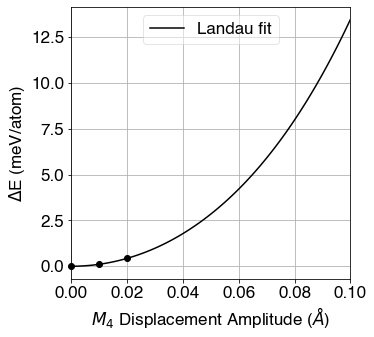

Index(['run_id', 'energy', 'volume', 'mag_s', 'mag_p', 'mag_d', 'mag_tot',
       'point_group', 'lattice'],
      dtype='object')


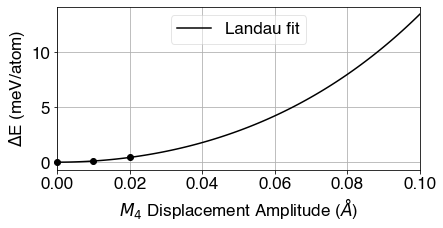

In [6]:
### Quadratic surface
infile = home + '/Projects/BaCoS2/correct_mag/disp-estruc/stats-quadratic.tsv'
amplitudes = [0, 1, 2] 
plot_path(infile, amplitudes, width=5, height=5, label='crooked-M4-quad', xmax=0.1)
plot_path(infile, amplitudes, width=6.5, height=3, label='crooked-M4-quad-wide', xmax=0.1)

In [5]:
df

,run_id,energy,volume,mag_s,mag_p,mag_d,mag_tot,point_group,lattice,de,disp
0,U3-M1-disp0,-171.265616,720.15,-0.0,-0.0,0.0,-0.0,D_2d.,tetragonal,0.000000,0.000
1,U3-M1-disp1,-171.258191,720.15,-0.0,-0.0,-0.0,-0.0,C_1,tetragonal,0.232024,0.010
2,U3-M1-disp2,-171.293963,720.15,-0.0,-0.0,-0.0,-0.0,C_1,tetragonal,-0.885851,0.020
3,U3-M1-disp3,-171.322150,720.15,-0.0,-0.0,-0.0,-0.0,C_1,tetragonal,-1.766699,0.030
4,U3-M1-disp4,-171.343026,720.15,-0.0,-0.0,0.0,-0.0,C_1,tetragonal,-2.419052,0.040
5,U3-M1-disp5,-171.352856,720.15,0.0,0.0,0.0,0.0,C_1,tetragonal,-2.726262,0.050
6,U3-M1-disp7.5,-171.334086,720.15,0.0,0.0,-0.0,0.0,C_1,tetragonal,-2.139690,0.075
7,U3-M1-disp10,-171.242689,720.15,0.0,0.0,-0.0,0.0,C_1,tetragonal,0.716479,0.100
8,U3-M1-disp12.5,-171.062937,720.15,-0.0,-0.0,-0.0,-0.0,C_1,tetragonal,6.333718,0.125


Index(['kpoint', 'disp', 'total_energy', 'drift_x', 'drift_y', 'drift_z',
       'volume', 'mag_s', 'mag_p', 'mag_d', 'mag_tot'],
      dtype='object')


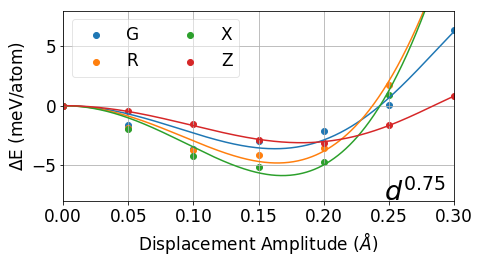

In [29]:
### Extracting data

infile = "../../mod-path/stats-d075.txt"

df = pd.read_table(infile)
# df['doping'] = doping_levels_num
print(df.keys())
df['de'] = (df['total_energy']-df['total_energy'][0])*1000/72
df['disp'] = df['disp']*0.01
# df


### Energy per kpoint over displacement ###
# WIDTH = 7
# HEIGHT = 3.5
# YLIMS = [-6,6]
XLIMS = [0,0.3]
# X_AXIS = 'Displacement Amplitude ($\AA$)'
# Y_AXIS = '$\Delta$E (meV/atom)'
# LABEL_FONT = 17

fig = plt.figure(figsize=(WIDTH,HEIGHT))


for kpt in 'GRXZ':
    sub_df = df[df.kpoint == kpt]
    x = sub_df['disp']
    y = sub_df['de']
    plt.scatter(x, y, label=kpt)
        
    # Fitting to Landau model
    def landau(x, a, b,c):
        return a*x**2 + b*x**4 + c*x**6
    
    pmodel = Model(landau)
    params = pmodel.make_params(a=-1,b=1,c=1)
    result = pmodel.fit(y, params, x=x)
#     print(result.fit_report())
    
    x2 = np.linspace(x.min(), x.max(), 500)
    y2 = result.eval(x=x2)
    
#     pv = np.polyfit(x, y, 3)
#     fit = np.poly1d(pv)
#     y2 = fit(x2)
#     f = interp1d(x, y, kind='quadratic')
#     y2 = f(x2)
    plt.plot(x2, y2)


# Chance font size
plt.gca().xaxis.label.set_fontsize(LABEL_FONT)
plt.gca().yaxis.label.set_fontsize(LABEL_FONT)
plt.gca().tick_params(labelsize=LABEL_FONT)
# plt.gca().get_yticklabels().fontsize(LABEL_FONT)

plt.grid(True)
plt.xlabel(X_AXIS)
plt.ylabel(Y_AXIS)
plt.xlim(XLIMS)
plt.ylim(YLIMS)
plt.legend(fancybox=True, ncol=2, framealpha=0.5, fontsize=LABEL_FONT) 
plt.text(0.9, 0.12, "$d^{0.75}$", horizontalalignment='center', verticalalignment='top',\
         transform=plt.gca().transAxes,fontsize=LABEL_FONT+10)

plt.show()

## Saving plot
fig.savefig('mod-path-d075' + '.png', bbox_inches='tight', dpi=500)
fig.savefig('mod-path-d075-vec' + '.pdf', bbox_inches='tight')